In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Machine Learning/BigDataProject')

Load model and weights

In [2]:
from keras.models import load_model
os.chdir('/content/drive/My Drive/Machine Learning/BigDataProject/modelML')
model=load_model('seismologicML.model')
model.load_weights('seismologicML.weights')
model.summary()

Using TensorFlow backend.















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 600, 128)          10368     
_________________________________________________________________
batch_normalization_1 (Batch (None, 600, 128)          512       
_________________________________________________________________
activation_1 (Activation)    (None, 600, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 128)          49280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 128)          512       
___________

Installazione librerie

In [3]:
!pip install owlready2
!pip install rdflib

     |████████████████████████████████| 20.8MB 145kB/s 
  Created wheel for owlready2: filename=Owlready2-0.22-cp36-cp36m-linux_x86_64.whl size=20259255 sha256=2c6ffd1e688f3c69bb776aabe4f71f73cd13f80a76b16e8c75245241ac3cf4cf
  Stored in directory: /root/.cache/pip/wheels/49/f0/a3/d3fd75a7a3b0648ae77975a8254f6a3146a07cc077351b4a40
Successfully built owlready2
     |████████████████████████████████| 348kB 8.9MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 


Caricamento ontologia dal drive

In [0]:
from owlready2 import *
path = 'file:///content/drive/My Drive/Machine Learning/BigDataProject/eevOntology.owl'
onto = get_ontology(path).load()

In [5]:
list(onto.classes())

[eevOntology.Event,
 eevOntology.Event_Distance_Property,
 eevOntology.Epincenter_Property,
 eevOntology.Seismograph_Station,
 eevOntology.City_Property,
 eevOntology.Magnitudo_Property,
 eevOntology.Kind_Of_Event,
 sosa.Platform,
 sosa.Sensor,
 sosa.Result,
 sosa.Observation,
 eevOntology.Data,
 ssn.Property,
 eevOntology.Earthquake,
 eevOntology.QuarryBlast,
 eevOntology.Thunder]

In [6]:
list(onto.object_properties())

[eevOntology.has_distance,
 eevOntology.has_epicenter,
 eevOntology.has_location,
 eevOntology.has_magnitudo,
 eevOntology.is_kind_of,
 eevOntology.observe_event,
 eevOntology.observed_by_station,
 eevOntology.observes_property,
 sosa.hosts,
 sosa.isResultOf,
 sosa.madeBySensor]

In [7]:
list(onto.data_properties())


[eevOntology.coordinate,
 eevOntology.dataIRI,
 eevOntology.dataLabel,
 eevOntology.hasDistanceValue,
 eevOntology.hasEpicenterValue,
 eevOntology.hasMagnitudoValue,
 eevOntology.hasPopulation,
 eevOntology.neighbourhood,
 sosa.resultTime]

In [8]:
list(onto.individuals())

[resource.Bari,
 resource.Bologna,
 resource.Brindisi,
 resource.Cagliari,
 resource.Catania,
 resource.Enna,
 resource.Firenze,
 resource.Genova,
 resource.Messina,
 resource.Milano,
 resource.Napoli,
 resource.Palermo,
 resource.ReggioCalabria,
 resource.Roma,
 resource.Torino,
 resource.Venezia,
 eevOntology.Acireale,
 eevOntology.Acquapendente,
 eevOntology.AcquiTerme,
 eevOntology.Afragola,
 eevOntology.Agrigento,
 eevOntology.Albenga,
 eevOntology.Alessandria,
 eevOntology.Altamura,
 eevOntology.Ancona,
 eevOntology.Andria,
 eevOntology.Anzio,
 eevOntology.Aosta,
 eevOntology.Aquileia,
 eevOntology.Arezzo,
 eevOntology.Asti,
 eevOntology.Avella,
 eevOntology.Aversa,
 eevOntology.Avezzano,
 eevOntology.Avola,
 eevOntology.Balvano,
 eevOntology.Bari,
 eevOntology.Barletta,
 eevOntology.BassanoDelGrappa,
 eevOntology.Benevento,
 eevOntology.Bergamo,
 eevOntology.Bitonto,
 eevOntology.Bologna,
 eevOntology.Bolzano,
 eevOntology.Brescia,
 eevOntology.BustoArsizio,
 eevOntology.Caiazzo

Data input

In [0]:
#{ display-mode: "form" }

Event = "Evento campi flegreii" #@param {type:"string"}
Label = "segnale1" #@param {type:"string"}
DataIRI = "/content/drive/My Drive/Machine Learning/BigDataProject/signal1.dat" #@param {type:"string"}
City = "Napoli" #@param {type:"string"}
Date = "2019-12-19" #@param {type:"date"}
Distance =  30#@param {type:"number"}
Epicenter = "40\xB046\u2032N 14\xB048\u2032E" #@param {type:"string"}
Magnitudo =  4.5#@param {type:"number"}
Station = "Stazione di napoli" #@param {type:"string"}
Sensor = "Sismografo Samsung" #@param {type:"string"}


Caricamento dati in ontologia

In [0]:
# creazione istanza 'event' nell'ontologia con label dato dell'utente
event1 = onto.Event(Event)

# creazione istanza 'data' che contiene il segnale
data1 = onto.Data(Label)

# aggiunta attributi all'oggetto data1 --> (label,IRI)
data1.dataLabel=[Label]
data1.dataIRI=[DataIRI]

#collegamento event1 con data1
event1.hasResult = [data1]
data1.isResultOf = [event1]

#collegamento event1 con magnitudo
magnitudoObject = onto.Magnitudo_Property(Label + "EventMagnitudo")
magnitudoObject.hasMagnitudoValue = [Magnitudo]
event1.has_magnitudo = [magnitudoObject]

In [0]:
#collegamento event1 con distanza
distanceObject = onto.Event_Distance_Property(Label + "EventDistance")
distanceObject.hasDistanceValue = [Distance]
event1.has_distance = [distanceObject]

In [0]:
#collegamento event1 con epicentro
epicenterObject = onto.Epincenter_Property(Label + "EventEpicenter")
epicenterObject.hasEpicenterValue = [Epicenter]
event1.has_epicenter = [epicenterObject]

In [0]:
#collegamento event1 e stazione sismografa
seismographObject = onto.search_one(iri = "*"+Station) if onto.search_one(iri = "*"+Station) else onto.Seismograph_Station(Station)
seismographObject.observe_event = [event1]
event1.observed_by_station = [seismographObject]

In [0]:
#collegamento tra station e location
seismographObject.has_location = [onto.search_one(iri = "*" + City)]

In [0]:
#collegamento stazione sismografia con sensore
sosa = onto.get_namespace(base_iri= "http://www.w3.org/ns/sosa/")
sensorObject = onto.search_one(iri = "*"+Sensor) if onto.search_one(iri = "*"+Sensor) else sosa.Sensor(Sensor)
seismographObject.hosts = [sensorObject]
event1.madeBySensor = [sensorObject]

In [16]:
# aggiunta dateTime all'evento
event1.resultTime = [Date]
event1.get_properties()

{eevOntology.observed_by_station,
 eevOntology.has_distance,
 eevOntology.has_epicenter,
 sosa.resultTime,
 eevOntology.has_magnitudo,
 sosa.madeBySensor}

In [17]:
# simple query --> type, for searching Individuals of a given Class
print(onto.search(type = onto.Event))
print(onto.search(type = onto.Data))
print(event1.observed_by_station[0].hosts)
#print(onto.search(type = onto.City_Property))

[eevOntology.Evento campi flegreii]
[eevOntology.segnale1]
[sosa.Sismografo Samsung]


In [0]:
eartquakeObject = onto.search_one(iri = "*EartquakeInstance") if onto.search_one(iri = "*EartquakeInstance") else onto.Earthquake("EartquakeInstance")
thunderObject = onto.search_one(iri = "*ThunderInstance") if onto.search_one(iri = "*ThunderInstance") else onto.Thunder("ThunderInstance")
quarryBlastObject = onto.search_one(iri = "*QuarryBlastInstance") if onto.search_one(iri = "*QuarryBlastInstance") else onto.QuarryBlast("QuarryBlastInstance")

SPARQL Query per ottenere segnale generico + informazioni semantiche

In [19]:
#stampa tutte le triple

import rdflib # vuole file RDF/XML, non OWL/XML

onto.save('/content/drive/My Drive/Machine Learning/BigDataProject/eevOntology2.owl')
path2 = 'file:///content/drive/My Drive/Machine Learning/BigDataProject/eevOntology2.owl'

g=rdflib.Graph()
g.load(path2)

for row in g.query("SELECT ?s ?p ?o " \
            "WHERE { " \
            "?s ?p ?o . " \
            "}"):
  
  s = re.sub(r'.*#',"",row.s) # stampa migliore

  p = re.sub(r'.*#', "", row.p)

  o = re.sub(r'.*#', "", row.o)
  print('{s:'+s+',','p:'+p+',','o:'+o+'}')
  print('____________________________________________________________________')


file:///content/drive/My Drive/Machine Learning/BigDataProject/eevOntology2.owl does not look like a valid URI, trying to serialize this will break.
http://www.semanticweb.org/BigDataProject/ontologies/2019/10/eev#Evento campi flegreii does not look like a valid URI, trying to serialize this will break.
http://www.w3.org/ns/sosa/Sismografo Samsung does not look like a valid URI, trying to serialize this will break.
http://www.semanticweb.org/BigDataProject/ontologies/2019/10/eev#Evento campi flegreii does not look like a valid URI, trying to serialize this will break.
http://www.semanticweb.org/BigDataProject/ontologies/2019/10/eev#Stazione di napoli does not look like a valid URI, trying to serialize this will break.
http://www.semanticweb.org/BigDataProject/ontologies/2019/10/eev#Evento campi flegreii does not look like a valid URI, trying to serialize this will break.
http://www.w3.org/ns/sosa/Sismografo Samsung does not look like a valid URI, trying to serialize this will break.
ht

{s:Muggiò, p:type, o:City_Property}
____________________________________________________________________
{s:Treviso, p:type, o:NamedIndividual}
____________________________________________________________________
{s:http://dbpedia.org/resource/ReggioCalabria, p:hasPopulation, o:559215}
____________________________________________________________________
{s:CastelDiSangro, p:type, o:NamedIndividual}
____________________________________________________________________
{s:is_kind_of, p:type, o:ObjectProperty}
____________________________________________________________________
{s:Modena, p:type, o:NamedIndividual}
____________________________________________________________________
{s:Crotone, p:type, o:City_Property}
____________________________________________________________________
{s:Scicli, p:type, o:City_Property}
____________________________________________________________________
{s:http://dbpedia.org/resource/Genova, p:type, o:NamedIndividual}
___________________________________

In [20]:
# SPARQL query --> (DataIRI,info semantiche)

for row in g.query("""
           PREFIX : <http://www.semanticweb.org/BigDataProject/ontologies/2019/10/eev#>
           PREFIX dbo: <http://dbpedia.org/ontology/>
           PREFIX dbr: <http://dbpedia.org/resource/>
           PREFIX dbpprop: <http://dbpedia.org/property/>
           PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
           PREFIX xsd:<http://www.w3.org/2001/XMLSchema#>

            SELECT DISTINCT ?o ?event ?station ?sensor ?city ?distanceValue ?epicenterValue ?magnitudoValue ?date
                WHERE {
                ?s :dataLabel """+"\""+Label+"""\"^^xsd:string .
                ?s :dataIRI ?o .
                ?s sosa:isResultOf ?event .
                ?station :observe_event ?event .
                ?station sosa:hosts ?sensor .
                ?station :has_location ?city .
                ?event :has_distance ?distance .
                ?event  :has_epicenter ?epicenter .
                ?event  :has_magnitudo ?magnitudo .
                ?event sosa:resultTime ?date .
                ?distance :hasDistanceValue ?distanceValue .
                ?epicenter :hasEpicenterValue ?epicenterValue .
                ?magnitudo :hasMagnitudoValue ?magnitudoValue .
              }"""):
  
  IriX=row.o
  EventX=re.sub(r'.*#', "", row.event)
  StationX=re.sub(r'.*#', "", row.station)
  SensorX=re.sub(r'.*/', "", row.sensor)
  CityX=re.sub(r'.*/', "", row.city)
  DistanceX=re.sub(r'.*#', "", row.distanceValue)
  EpicenterX=re.sub(r'.*#', "", row.epicenterValue)
  MagnitudoX=re.sub(r'.*#', "", row.magnitudoValue)
  DateTimeX=re.sub(r'.*#', "", row.date)
  print(IriX+'\n'+EventX+'\n'+StationX+'\n'+SensorX+'\n'+CityX+'\n'+DistanceX+'\n'+EpicenterX+'\n'+MagnitudoX+'\n'+DateTimeX)

/content/drive/My Drive/Machine Learning/BigDataProject/signal1.dat
Evento campi flegreii
Stazione di napoli
Sismografo Samsung
Napoli
30
40°46′N 14°48′E
4.5
2019-12-19


Libreria per SPARQL endpoint

In [21]:
!pip install SPARQLWrapper


Dbpedia

In [22]:
#query per recuperare l'entità città tramite il link della risorsa su Dbpedia

from SPARQLWrapper import SPARQLWrapper, JSON 

sparql = SPARQLWrapper("http://dbpedia.org/sparql") # wrapper per virtuoso
sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX xsd:<http://www.w3.org/2001/XMLSchema#>
    
    SELECT DISTINCT ?city
    FROM <http://dbpedia.org>
    WHERE { 
?city rdfs:label """+"\""+CityX+"""\"@it .
     }
""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]: # matrice,prendo riga results in colonna bindings
    print(result["city"]["value"])

# salvataggio risultati query
city= result["city"]["value"]

http://dbpedia.org/resource/Naples


In [23]:
#query per il recupero da Dbpedia della popolazione e delle immagini associate alla città

sparql = SPARQLWrapper("http://dbpedia.org/sparql") # wrapper per virtuoso
sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
           PREFIX dbo: <http://dbpedia.org/ontology/>
           PREFIX dbr: <http://dbpedia.org/resource/>
           PREFIX dbp: <http://dbpedia.org/property/>
           PREFIX xsd:<http://www.w3.org/2001/XMLSchema#>
    SELECT DISTINCT ?population ?image
    WHERE { 
<"""+city+'> '+"""dbo:populationTotal ?population.
<"""+city+'> '+""" dbo:thumbnail ?image.
     }
""")
# la query ritorna popolazione e immagine di Napoli

# Converte results in formato JSON
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]: # matrice,prendo riga results in colonna bindings
    print(result["population"]["value"],result["image"]["value"])

# salvataggio risultati query
population= result["population"]["value"]
url=result["image"]["value"]

975260 http://commons.wikimedia.org/wiki/Special:FilePath/MontageofNaples.jpg?width=300


In [27]:
# SPARQL query --> aree rurali e paesi nella provincia di Napoli

sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
           PREFIX dbo: <http://dbpedia.org/ontology/>
           PREFIX dbr: <http://dbpedia.org/resource/>
           PREFIX dbp: <http://dbpedia.org/property/>
           PREFIX xsd:<http://www.w3.org/2001/XMLSchema#>
    SELECT DISTINCT ?quartiere
    WHERE { 
     ?x dbp:seat <"""+city+'> '+""".
    ?quartiere dbo:locatedInArea|dbo:province ?x.
     }
     LIMIT 5
""")
# la query ritorna alcuni comuni e zone rurali che sono presenti nell'area metropolitana di Napoli
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
quartieri=[]
for result in results["results"]["bindings"]: # matrice,prendo riga results in colonna bindings
    # salvo valori in un generico vettore
    quartiere = re.sub(r'.*/',"",result["quartiere"]["value"]) # stampa migliore
    quartieri.append(quartiere)
    print(quartiere)

Mount_Somma
Mount_Barbaro
Mount_Vesuvius
Ischia
Mariglianella


Funzione di stampa

In [0]:
# funzione per la stampa di informazioni sul terremoto

def outputEarthquake():
    print('/!\\ /!\\ ALLERTA TERREMOTO /!\\ /!\\ \n')
    print('Avvertimento per '+population+' cittadini nella provincia di '+CityX+
          '\n____________________________________________________________\n'+
          ' \nZone a rischio:\n')
    
    for x in quartieri:
      print('-----------------------')
      print(x)
    print('____________________________________')
    print('\nCaratteristiche evento \n')
    print('Registrato da:  '+StationX+'\n'+
      'Sensore: '+SensorX+'\n'+
      'In data: '+DateTimeX+'\n'+
      'Epicentro: '+EpicenterX+'\n'+
      'Magnitudo: '+MagnitudoX+'\n'+
      'Distanza: '+DistanceX)

Prediction

In [42]:
import numpy as np

signal1 = np.loadtxt(IriX) # legge da file testo e ritorna vettore
signal1 = np.asarray(signal1) # converto in numpy array

signal1 = np.reshape(signal1, (1,signal1.shape[0],1))
# (1,2400,1)

pre=model.predict(signal1).astype(int)[0] # array([[1, 0, 0]])

if(np.array_equal(np.asarray([1,0,0]),pre)):
  # creazione istanza 'Earthquake' nell'ontologia e assegnazione all'evento1
  event1.is_kind_of = [eartquakeObject]
  outputEarthquake()
elif(np.array_equal(np.asarray([0,1,0]),pre)):
  # creazione istanza 'QuarryBlast' nell'ontologia e assegnazione all'evento1
  event1.is_kind_of= [quarryBlastObject]
  print(event1.is_kind_of)
  print(onto.QuarryBlast1)
elif(np.array_equal(np.asarray([0,0,1]),pre)):
  # creazione istanza 'Thunder' nell'ontologia e assegnazione all'evento1
  event1.is_kind_of = [thunderObject]
  print(event1.is_kind_of)
  print(onto.Thunder1)
else:
  print("NO CLASSIFYING")

/!\ /!\ ALLERTA TERREMOTO /!\ /!\ 

Avvertimento per 975260 cittadini nella provincia di Napoli
____________________________________________________________
 
Zone a rischio:

-----------------------
Mount_Somma
-----------------------
Mount_Barbaro
-----------------------
Mount_Vesuvius
-----------------------
Ischia
-----------------------
Mariglianella
____________________________________

Caratteristiche evento 

Registrato da:  Stazione di napoli
Sensore: Sismografo Samsung
In data: 2019-12-19
Epicentro: 40°46′N 14°48′E
Magnitudo: 4.5
Distanza: 30


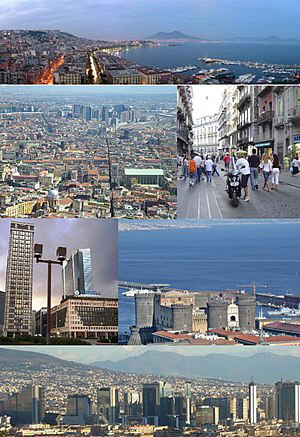

In [43]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [0]:
#salviamo l'ontologia
onto.save('/content/drive/My Drive/Machine Learning/BigDataProject/eevOntology2.owl')